In [1]:
# Load modules
import sys
sys.path.append('../mapplot/')

import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
import psyplot.project as psy
import pandas as pd
import xarray
from netCDF4 import Dataset,date2num

from timefunctions import *
import varfunctions as vf
import locfunctions as lf
import datetime as dt

from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray

INFO:numexpr.utils:Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
###############################################################################################
## CONSTANT FILE  ##
c_filename = "lfff00000000c.nc"
filepath = '/store/s83/swester/teamx/tdf_2019091212/output/19091212/'
const_file = filepath + c_filename
data_c = psy.open_dataset(const_file)

###############################################################################################
## DECIDE ##
# where to save
plotpath_base = '/scratch/tlezuo/icon-vis/lidar/data/'
# decide which locations to calculate
loc_list = []
# loc_list.extend([])
loc_list=[lf.kols]

# decide which variables to calculate
pvars_list = []
# pvars_list.extend([vf.qv_2m,vf.T_2M])
pvars_list= [vf.U, vf.V, vf.T, vf.QV,vf.P,vf.VEL,vf.DIR]

# decide which time period to plot
startdate = dt.datetime(2019,9,13,00,00)
enddate = dt.datetime(2019,9,14,00,00)
plotfreq = '0h30min'
plotdates = pd.date_range(startdate,enddate,freq=plotfreq)

In [4]:
loc=lf.kols
lidar_data = np.load('lidar_data_'+loc.name+'.npy',allow_pickle='TRUE').item()

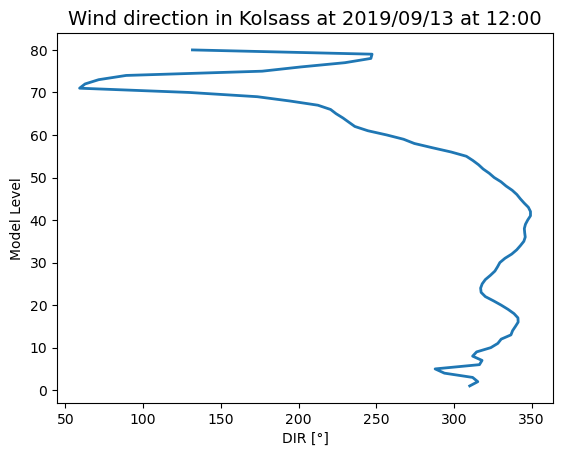

In [6]:
## PLOT SINGLE PROFILE ##
pvar=vf.DIR
pdate=dt.datetime(2019,9,13,12,00)

# Create plot of var_coord
f, axes = plt.subplots(1,1)                                                                                              
ax = axes                                                                                                                
h = ax.plot(lidar_data[pvar.name][0,:],  lidar_data['height'], lw=2)
ax.set_xlabel(pvar.name+' '+pvar.units)
ax.set_ylabel('Model Level')
ax.set_title(pvar.title+' in '+loc.name + ' at ' +pdate.strftime('%Y/%m/%d at %H:%M'), fontsize=14)
# plt.ylim([0,20])
# plt.xlim([pvar.min,pvar.max]);
plt.show()

Text(0, 0.5, 'VEL [m/s]')

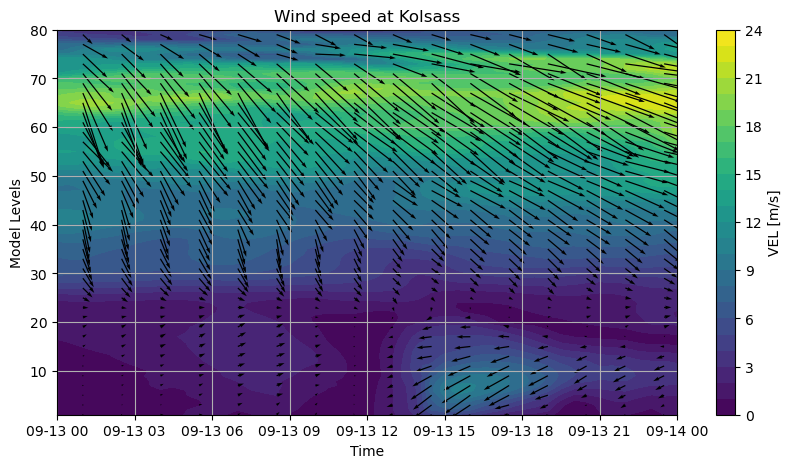

In [9]:
## PLOT LIDAR PLOT ##
# select variable
pvar=vf.VEL

# set data
x = plotdates
y = lidar_data['height'][::-1]
z = np.transpose(lidar_data[pvar.name])
levels = np.arange(pvar.min,pvar.max,pvar.ticks)
levels = np.arange(pvar.min,25,pvar.ticks)

#create plot
fig, ax = plt.subplots(1,1, figsize=(10,5))
plt.contourf(x,y,z, levels = levels)
cbar = plt.colorbar()
# add windbarbs
dx = 3
dy = 2
q_scale = 30
q_width = 0.002
ax.quiver(x[2::dx], y[::dy], 
        np.transpose(lidar_data['U'])[::dy, 2::dx], #U
        np.transpose(lidar_data['V'])[::dy, 2::dx], #V
        scale=q_scale, scale_units='inches',
        width=q_width)

# plotting options
# ax.set_ylim(0,50) # lowest 30 levels
ax.grid()
ax.set_title(pvar.title+' at '+loc.name)
ax.set_xlabel('Time')
ax.set_ylabel('Model Levels')
cbar.ax.set_ylabel(pvar.name + ' ' + pvar.units)